## Problem Set 1, due Sunday October 15th at 11:59pm 


#### Before You Start
For this problem set, you should download the flights.zip and weather.csv datasets from Canvas. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser. You should also make sure the following libraries load correctly.

In [1]:
# Numpy is a library for working with Arrays
import numpy as np
print ("Your numpy version: %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("Your SciPy version: %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print ("Your Pandas version: %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print ("Your Mapltolib version: %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Your Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

Your numpy version: 1.21.5 (need at least 1.7.1)
Your SciPy version:  1.7.3 (need at least 0.12.0)
Your Pandas version:  1.4.2 (need at least 0.11.0)
Your Mapltolib version:  3.5.1 (need at least 1.2.1)
Your Scikit-Learn version:  1.0.2 (need at least 0.13.1)


#### Instructions: 
 
In this problem set you will perform a basic exploratory analysis on an example dataset, bringing to bear all of your new skills in data manipulation and visualization. You will be required to submit well commented python code, documenting all code used in this problem set, along with a write up answering all questions below. Use figures as appropriate to support your answers, and when required by the problem. 

This data set uses the NYCFlights13 dataset that contains information for flights originating from New York City (NYC) in 2013. You can download the dataset from flights data that you downloaded from canvas (flights.zip).

Selected questions ask you to answer in multiple ways. Make sure to provide different functions or ways for answering the same question. This will help you see that most data questions can be answered in different ways even with the same software language.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
flights_df= pd.read_csv('flights.csv')

In [4]:
# Let's start by looking at some of the structural attributes of the dataset

print (flights_df.shape)   # rows and columns
print (flights_df.columns) # column names
print (flights_df.dtypes)  # data types of each column

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [5]:
# Let's look at the unique destinations of the flights in the data 

a = flights_df.dest.unique()
print(a)

# Let's now look at the top ten rows to get a sense of the data
flights_df.head(10)


['IAH' 'MIA' 'BQN' 'ATL' 'ORD' 'FLL' 'IAD' 'MCO' 'PBI' 'TPA' 'LAX' 'SFO'
 'DFW' 'BOS' 'LAS' 'MSP' 'DTW' 'RSW' 'SJU' 'PHX' 'BWI' 'CLT' 'BUF' 'DEN'
 'SNA' 'MSY' 'SLC' 'XNA' 'MKE' 'SEA' 'ROC' 'SYR' 'SRQ' 'RDU' 'CMH' 'JAX'
 'CHS' 'MEM' 'PIT' 'SAN' 'DCA' 'CLE' 'STL' 'MYR' 'JAC' 'MDW' 'HNL' 'BNA'
 'AUS' 'BTV' 'PHL' 'STT' 'EGE' 'AVL' 'PWM' 'IND' 'SAV' 'CAK' 'HOU' 'LGB'
 'DAY' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'BUR' 'RIC' 'GSP' 'GRR' 'MCI'
 'ORF' 'SAT' 'SDF' 'PDX' 'SJC' 'OMA' 'CRW' 'OAK' 'SMF' 'TUL' 'TYS' 'OKC'
 'PVD' 'DSM' 'PSE' 'BHM' 'CAE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ACK' 'BGR'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC' 'LGA']


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


#### Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc.

* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

#### Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [6]:
# Your code here
flights_df1=flights_df[flights_df.dest=='SEA']
flights_df1.shape[0]

3923

There were 3923 flights from NYC to Seattle (airport code SEA) in 2013. 

(b) How many airlines fly from NYC to Seattle?

In [7]:
# Your code here
airlines = flights_df1['carrier'].nunique()
airlines

5

There were 5 airlines fly from NYC to Seattle.

(c) How many unique air planes fly (number of flights) from NYC to Seattle?

In [8]:
# Your code here
num_unique = flights_df1['tailnum'].nunique()
num_unique

935

 There were 935 unique air planes fly (number of flights) from NYC to Seattle.

(d) What is the average arrival delay for flights from NYC to Seattle?

In [9]:
# Your code here
avg_arrival_delay = flights_df1['arr_delay'].mean()
avg_arrival_delay

-1.0990990990990992

The average arrival delay for flights from NYC to Seattle is -1.1 minutes.

(e) What proportion of flights to Seattle come from each NYC airport? Provide two ways of answering the question.

In [10]:
# Get all the airports in NYC
all_airports = flights_df['origin'].unique()

# Get all unique airports that have flights to Seattle (SEA)
airports_to_sea = flights_df[flights_df['dest'] == 'SEA']['origin'].unique()

(all_airports, airports_to_sea)

(array(['EWR', 'LGA', 'JFK'], dtype=object),
 array(['EWR', 'JFK'], dtype=object))

In [11]:
# Your code here
# Method 1
proportion_1 = flights_df1.groupby('origin').size() / len(flights_df1)
proportion_1

origin
EWR    0.466735
JFK    0.533265
dtype: float64

In [12]:
# Method 2
proportions_2 = flights_df1['origin'].value_counts(normalize=True)
proportions_2

JFK    0.533265
EWR    0.466735
Name: origin, dtype: float64

The proportion of flights to Seattle come from each NYC airport is 0.53 for JFK airport and 0.47 for EWR airport. There are no flights flying from LGA airport in this dataset.

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [108]:
# Your code here
# Create a new column called date
flights_df['date'] = pd.to_datetime(flights_df[['year', 'month', 'day']])

In [110]:
# Calculate average delays by date
avg_delays = flights_df.groupby('date').agg({
    'dep_delay': 'mean',
    'arr_delay': 'mean'
})

In [112]:
# Find the largest average departure delay
max_dep_delay = avg_delays['dep_delay'].idxmax()
max_dep_delay

Timestamp('2013-03-08 00:00:00')

In [114]:
# Find the largest average arrival delay
max_arr_delay = avg_delays['arr_delay'].idxmax()
max_arr_delay

Timestamp('2013-03-08 00:00:00')

The largest average departure delay is 2013-03-08 and the largest average arrival delay is 2013-03-08.

(b) Focusing on the number of delayed flights in a day, what was the worst day to fly out of NYC in 2013 if you dislike delayed flights?

In [118]:
# Your code here
# Count the number of delayed flights for each date
most_delayed_flights = flights_df[flights_df['dep_delay'] > 0].groupby('date').size()

In [120]:
# Find the date with the most delayed flights
worst_day = most_delayed_flights.idxmax()
worst_day

Timestamp('2013-12-23 00:00:00')

In [122]:
# Find the number with the most delayed flights on the above date
number_of_delays = most_delayed_flights[worst_day]
number_of_delays

674

The worst day to fly out of NYC in 2013 is 2013-12-23,because this day has the most delayed flights, the number is 674.

(c) Are there any seasonal patterns in departure delays for flights from NYC (e.g., check monthly delay averages)?

In [126]:
# Your code here
monthly_dep_delay = flights_df.groupby('month')['dep_delay'].mean()
monthly_dep_delay

month
1     10.036665
2     10.816843
3     13.227076
4     13.938038
5     12.986859
6     20.846332
7     21.727787
8     12.611040
9      6.722476
10     6.243988
11     5.435362
12    16.576688
Name: dep_delay, dtype: float64

We can clearly see from the results that there is a seasonal change in departure delays for flights from NYC. Flights from NYC have the longest average departure delays during the summer months (June: 20.85 minutes, July: 21.73 minutes), especially in June and July. In autumn, delays are the shortest (September: 6.72 minutes, October: 6.24 minutes, November: 5.44 minutes). There are also relatively long delays in the winter months of December (16.58 minutes) and the spring months of March and April (13.23 minutes and 13.94 minutes respectively). The data revealed a clear seasonal pattern, with longer delays in the summer and winter and the shortest delays in the fall. Because summer and winter are the travel times for most students, especially in December when there are many festivals, delays are normal. In addition, winter and summer are easily affected by weather delays, such as rain or snow.

(d) On average, how do departure delays vary over the course of a day (e.g., analyze by hour)?

In [21]:
# Your code here
dep_delay_hour = flights_df.groupby('hour')['dep_delay'].mean()
dep_delay_hour

hour
0.0     128.642452
1.0     207.049327
2.0     239.921875
3.0     304.727273
4.0      -5.554098
5.0      -4.355644
6.0      -1.520552
7.0       0.223289
8.0       1.091432
9.0       4.268295
10.0      5.548644
11.0      5.652309
12.0      7.601892
13.0      9.380639
14.0      8.090381
15.0     10.682049
16.0     13.621150
17.0     16.756593
18.0     18.664671
19.0     21.497342
20.0     28.266213
21.0     42.064964
22.0     68.190042
23.0     96.946865
24.0     64.862069
Name: dep_delay, dtype: float64

The pattern of departure delays shows clear changes throughout the day. Delay times increased significantly from 0 a.m. to 4 a.m., with the average delay times at 2 a.m. and 3 a.m. reaching 239.92 minutes and 304.73 minutes respectively. This may be due to the cumulative impact of night flights being affected by previous delayed flights. And between 4 a.m. and 6 a.m., which is the time of day with the least delays, flights are not only not delayed, but often depart early, with average delays of -5.55 minutes and -4.36 minutes. Delays gradually increase from 7 a.m. to 0.22 minutes at 7 a.m., increasing to 21.50 minutes at 19 p.m. Delays further increased at night, especially between 20:00 and 23:00, with delays of 68.19 minutes and 96.95 minutes at 22:00 and 23:00 respectively. Although there are very few flights at 24:00 in the morning, the average delay time reaches 64.86 minutes. Overall, delays gradually increase as the day progresses, starting in the morning, especially in the evening and early morning hours, which may be related to accumulated delays, air traffic control, and other factors.

## Question 3
    Which flight departing NYC in 2013 flew the fastest (e.g., calculate speed)?

In [22]:
# Your code here
# Get the speed
flights_df['speed'] = flights_df['distance'] / (flights_df['air_time'] / 60)

0         370.044053
1         374.273128
2         408.375000
3         516.721311
4         394.137931
             ...    
336771           NaN
336772           NaN
336773           NaN
336774           NaN
336775           NaN
Name: speed, Length: 336776, dtype: float64

In [23]:
# Sort data or get the maximum value
fastest_flight = flights_df.loc[flights_df['speed'].idxmax()]
fastest_flight

Unnamed: 0                 216448
year                         2013
month                           5
day                            25
dep_time                   1709.0
dep_delay                     9.0
arr_time                   1923.0
arr_delay                   -14.0
carrier                        DL
tailnum                    N666DN
flight                       1499
origin                        LGA
dest                          ATL
air_time                     65.0
distance                      762
hour                         17.0
minute                        9.0
date          2013-05-25 00:00:00
speed                  703.384615
Name: 216447, dtype: object

The fastest flight from NYC in 2013 was flight number 1499 operated by Delta Airlines (DL), with the tail number N666DN. The flight departed from LaGuardia Airport (LGA) to Atlanta (ATL) at 5:09 pm on May 25, 2013, with an average flight speed of approximately 703.38 mph.

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [24]:
# Your code here
# Get the count for every day
flight_counts = flights_df.groupby(['carrier', 'flight', 'dest']).size()
flight_counts

carrier  flight  dest
9E       2900    BNA     59
         2901    BOS     55
         2902    BOS     55
         2903    BOS     29
                 CLT     27
                         ..
YV       3778    IAD      3
         3788    IAD     23
         3790    IAD      9
         3791    IAD     15
         3799    IAD      1
Length: 11601, dtype: int64

In [25]:
# Get the flights whose count equals 365
Everyday_flights = flight_counts[flight_counts == 365]
Everyday_flights

carrier  flight  dest
AA       59      SFO     365
         119     LAX     365
         181     LAX     365
         1357    SJU     365
         1611    MIA     365
B6       219     CLT     365
         359     BUR     365
         371     FLL     365
         431     SRQ     365
         703     SJU     365
         1783    MCO     365
DL       2159    MCO     365
         2391    TPA     365
EV       5712    IAD     365
UA       15      HNL     365
VX       251     LAS     365
         407     LAX     365
         413     LAX     365
dtype: int64

In 2013, daily flights departing from NYC included：  
（1） AA Air Flight 59 to SFO, Flights 119 and 181 to LAX, Flight 1357 to SJU, and Flight 1611 to MIA.   
（2）B6 Airlines flight 219 to CLT, flight 359 to BUR, flight 371 to FLL, flight 431 to SRQ, flight 703 to SJU, and flight 1783 to MCO.   
（3）DL Airlines has flight 2159 to MCO and flight 2391 to TPA.   
（4）EV Airlines operates flight 5712 to IAD.   
（5）UA Airlines flight 15 to HNL.   
（6）Finally, VX Airlines flight 251 was bound for LAS, while flights 407 and 413 were bound for LAX.   
These flights depart from NYC every day.  


## Question 5
Develop one research question you can address using the NYCFlights13 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


### Research Questions：
#### Are some airlines more prone to delays than others? If so, which airlines have the longest average delays?

In [26]:
# Your code here
carrier_dep_delay = flights_df.groupby('carrier')['dep_delay'].mean().sort_values()
carrier_dep_delay

carrier
US     3.782418
HA     4.900585
AS     5.804775
AA     8.586016
DL     9.264505
MQ    10.552041
UA    12.106073
OO    12.586207
VX    12.869421
B6    13.022522
9E    16.725769
WN    17.711744
FL    18.726075
YV    18.996330
EV    19.955390
F9    20.215543
Name: dep_delay, dtype: float64

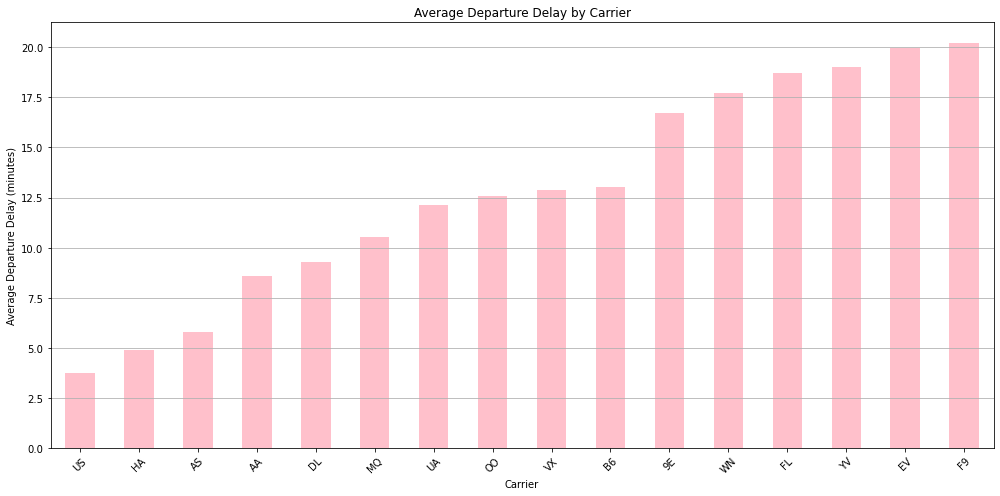

In [27]:
# First visualization
# Average departure delay by carrier
plt.figure(figsize=(14,7))
carrier_dep_delay.plot(kind='bar', color='pink')
plt.title('Average Departure Delay by Carrier')
plt.ylabel('Average Departure Delay (minutes)')
plt.xlabel('Carrier')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [28]:
carrier_arr_delay = flights_df.groupby('carrier')['arr_delay'].mean().sort_values()
carrier_arr_delay

carrier
AS    -9.930889
HA    -6.915205
AA     0.364291
DL     1.644341
VX     1.764464
US     2.129595
UA     3.558011
9E     7.379669
B6     9.457973
WN     9.649120
MQ    10.774733
OO    11.931034
YV    15.556985
EV    15.796431
FL    20.115906
F9    21.920705
Name: arr_delay, dtype: float64

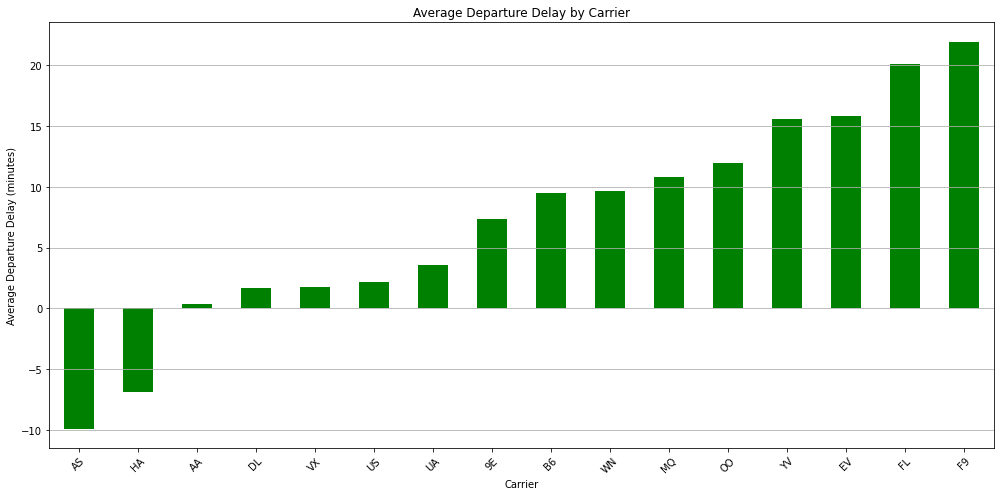

In [29]:
# Second visualization
# Average arrival delay by carrier
plt.figure(figsize=(14,7))
carrier_arr_delay.plot(kind='bar', color='green')
plt.title('Average Departure Delay by Carrier')
plt.ylabel('Average Departure Delay (minutes)')
plt.xlabel('Carrier')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

When examining 2013 NYC flight data, we discovered some key trends regarding departure delays and arrival delays. First,most airlines perform well in terms of departure delays, with the average delay time being less than 10 minutes. However, there are some airlines that perform significantly worse than others. In particular, "F9" (Frontier Airlines) and "EV" (ExpressJet Airlines) have average departure delays equal to or greater than 20 minutes. In terms of arrival delays, we observe a similar pattern to departure delays. Most airlines also perform relatively well with average arrival delays within 10 minutes. However, "FL" and "F9" perform poorly in this regard, with average arrival delays equal to or greater than 20 minutes. On the contrary, "US" (US Airways) and "HA" (Hawaiian Airlines) are two airlines that perform better. They perform well in terms of departure and arrival delays, with both average delay times being relatively low. There are even cases where arrive early. In summary, although most airlines' delay performance is good, two airlines, "F9" and "EV", have obvious delay problems and may need to take measures to improve their flight scheduling and management. At the same time, two airlines, "US" and "HA", performed well in terms of delays, indicating that they may have good practices and strategies in flight management.

## Question 6
What weather conditions (weather.csv) are associated with flight delays leaving NYC? Use graphics to explore and provide an explanation.

In [30]:
# Your code here
# Load the weather dataset
weather_df = pd.read_csv('weather.csv')
weather_df.head(10)

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0
5,6,EWR,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
6,7,EWR,2013,1.0,1.0,7.0,39.02,26.96,61.63,250.0,8.05546,9.270062,0.0,1012.3,10.0
7,8,EWR,2013,1.0,1.0,8.0,39.02,28.04,64.43,240.0,11.50780,13.242946,0.0,1012.5,10.0
8,9,EWR,2013,1.0,1.0,9.0,39.92,28.04,62.21,250.0,12.65858,14.567241,0.0,1012.2,10.0
9,10,EWR,2013,1.0,1.0,10.0,39.02,28.04,64.43,260.0,12.65858,14.567241,0.0,1011.9,10.0


In [31]:
# Do some basic checks
print (weather_df.shape)   # rows and columns
print (weather_df.columns) # column names
print (weather_df.dtypes)  # data types of each column

(8719, 15)
Index(['Unnamed: 0', 'origin', 'year', 'month', 'day', 'hour', 'temp', 'dewp',
       'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure',
       'visib'],
      dtype='object')
Unnamed: 0      int64
origin         object
year            int64
month         float64
day           float64
hour          float64
temp          float64
dewp          float64
humid         float64
wind_dir      float64
wind_speed    float64
wind_gust     float64
precip        float64
pressure      float64
visib         float64
dtype: object


In [32]:
# merge the dataset
merged_data = pd.merge(flights_df, weather_df, on=['year', 'month', 'day', 'hour', 'origin'], how='inner')
merged_data

,Unnamed: 0_x,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,...,Unnamed: 0_y,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,20,2013,1,1,601.0,1.0,844.0,-6.0,B6,N644JB,...,6,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
1,23,2013,1,1,606.0,-4.0,858.0,-12.0,AA,N633AA,...,6,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
2,25,2013,1,1,607.0,0.0,858.0,-17.0,UA,N53442,...,6,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
3,26,2013,1,1,608.0,8.0,807.0,32.0,MQ,N9EAMQ,...,6,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
4,30,2013,1,1,615.0,0.0,833.0,-9.0,DL,N326NB,...,6,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117246,336753,2013,9,30,2142.0,13.0,2250.0,11.0,EV,N12957,...,6538,69.98,53.06,54.94,170.0,5.75390,6.621473,0.0,1015.0,10.0
117247,336756,2013,9,30,2149.0,-7.0,2245.0,-23.0,UA,N813UA,...,6538,69.98,53.06,54.94,170.0,5.75390,6.621473,0.0,1015.0,10.0
117248,336757,2013,9,30,2150.0,-9.0,2250.0,-16.0,EV,N10575,...,6538,69.98,53.06,54.94,170.0,5.75390,6.621473,0.0,1015.0,10.0
117249,336761,2013,9,30,2211.0,72.0,2339.0,57.0,EV,N12145,...,6539,68.00,53.06,58.80,150.0,5.75390,6.621473,0.0,1015.4,10.0


In [33]:
import seaborn as sns

In [34]:
correlation_matrix = merged_data[['temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust', 
                                  'precip', 'pressure', 'visib', 'dep_delay']].corr()

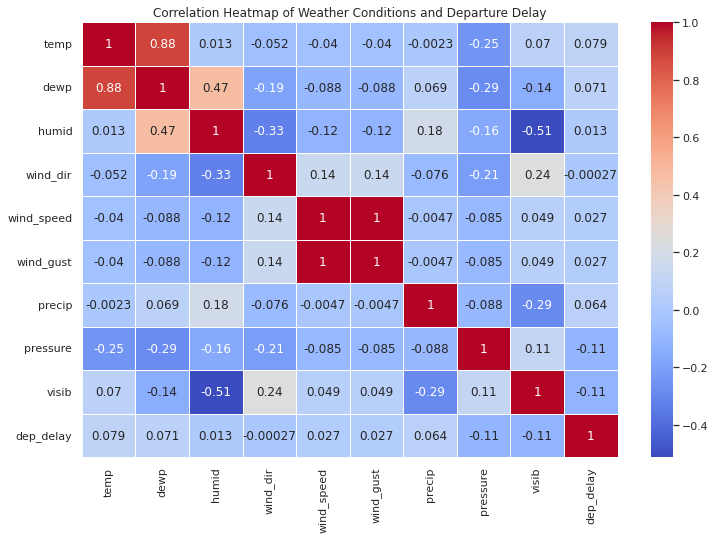

In [35]:
# visualization in heat map
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Weather Conditions and Departure Delay')
plt.show()

#### Positively Correlated Weather Conditions (Increased Likelihood of Delays)
When the values of the following weather variables increase, there is a higher likelihood of departure delays for flights:  
（1）Temperature (temp: 0.079): Days with higher temperatures have a moderate positive correlation with the likelihood of flight delays.  
（2）Dew Point Temperature (dewp: 0.071): A higher dew point temperature might be associated with an increase in flight delays.  
（3）Humidity (humid: 0.013): Although the relationship is weak, an increase in humidity seems to have a slight positive correlation with an increase in flight delays.  
（4）Wind Speed (wind_speed: 0.027) and Wind Gust (wind_gust: 0.027): An increase in wind speed and wind gusts has a slight positive correlation with an increase in flight delays.  
（5）Precipitation (precip: 0.064): Days with more precipitation seem to have a moderate positive correlation with a higher likelihood of flight delays.

#### Negatively Correlated Weather Conditions (Decreased Likelihood of Delays)  
When the values of the following weather variables increase, there is a lower likelihood of departure delays for flights:  
（1）Pressure (pressure: -0.11): Higher atmospheric pressure has a moderate negative correlation with the likelihood of flight delays.  
（2）Visibility (visib: -0.11): Days with higher visibility have a moderate negative correlation with the likelihood of flight delays.  
（3）Wind direction(wind_dir:-0.00027): The negative correlation between wind direction and departure delay is extremely weak, almost negligible, suggesting that there's essentially no discernible relationship between them in this context. This might be due to the minor influence wind direction shifts have on departure delays, given modern aircraft capabilities and navigational technologies.